In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
df = pd.read_csv('2019-data/Merriweather_2019.csv', header = 2)
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI
0,2019,1,1,0,0,0,0
1,2019,1,1,0,30,0,0
2,2019,1,1,1,0,0,0
3,2019,1,1,1,30,0,0
4,2019,1,1,2,0,0,0
...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0,0
17516,2019,12,31,22,0,0,0
17517,2019,12,31,22,30,0,0
17518,2019,12,31,23,0,0,0


In [3]:
df['Date'] = pd.to_datetime(df[['Minute','Hour','Day','Month','Year']])
df.index = range(0, df.shape[0])
#df = df[df['Month'] == 1]


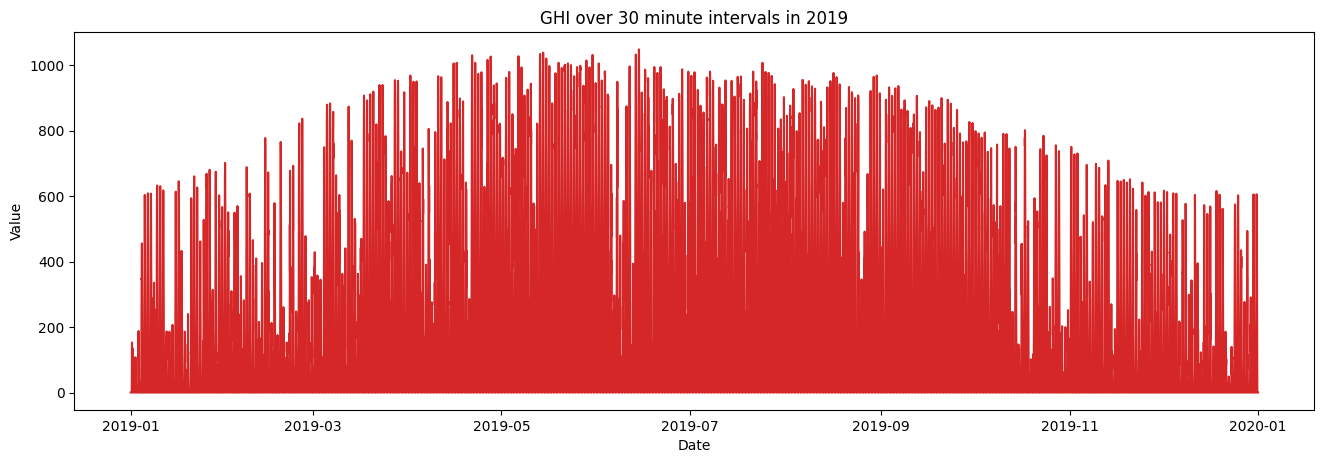

In [4]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    #set proportions of figure and resolution(100)
    plt.figure(figsize=(16,5), dpi=dpi)
    #plots the index against value, in this case, dates against values
    plt.plot(x, y, color='tab:red')
    #gca gets the titles
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Date, y=df.GHI, title='GHI over 30 minute intervals in 2019') 

In [5]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df.GHI.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.528790743450465
p-value: 9.990080197589345e-09
Critial Values:
   1%, -3.4307242638530675
Critial Values:
   5%, -2.861705410152796
Critial Values:
   10%, -2.5668580435332715


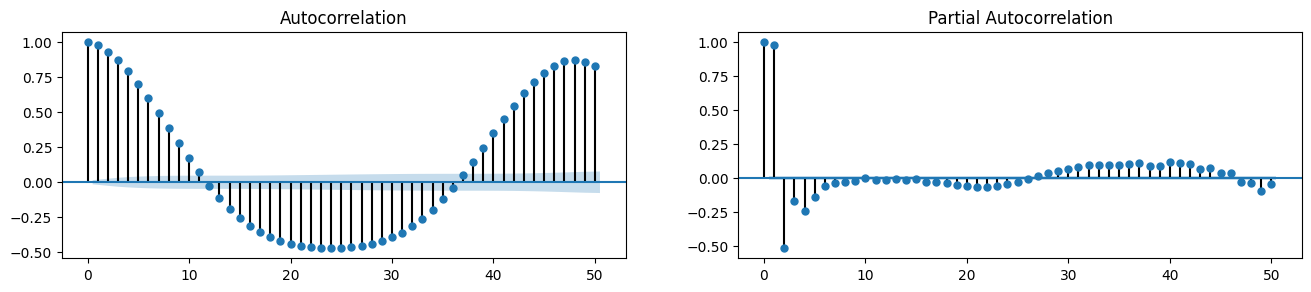

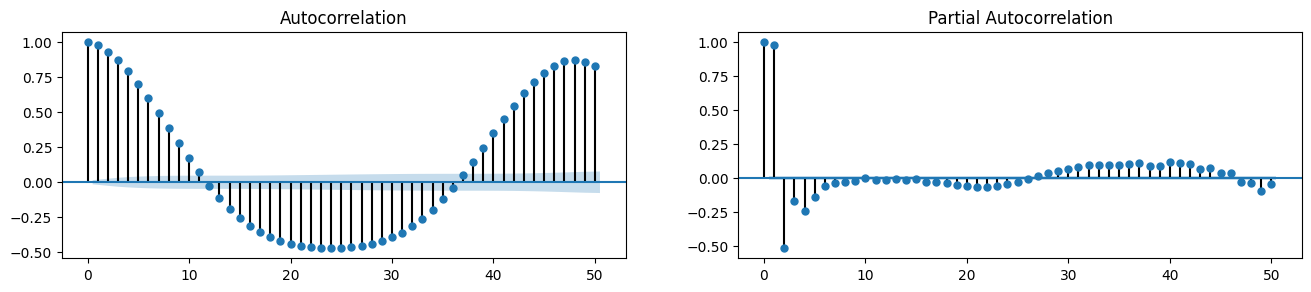

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.GHI.tolist(), lags=50, ax=axes[0])
plot_pacf(df.GHI.tolist(), lags=50, ax=axes[1])


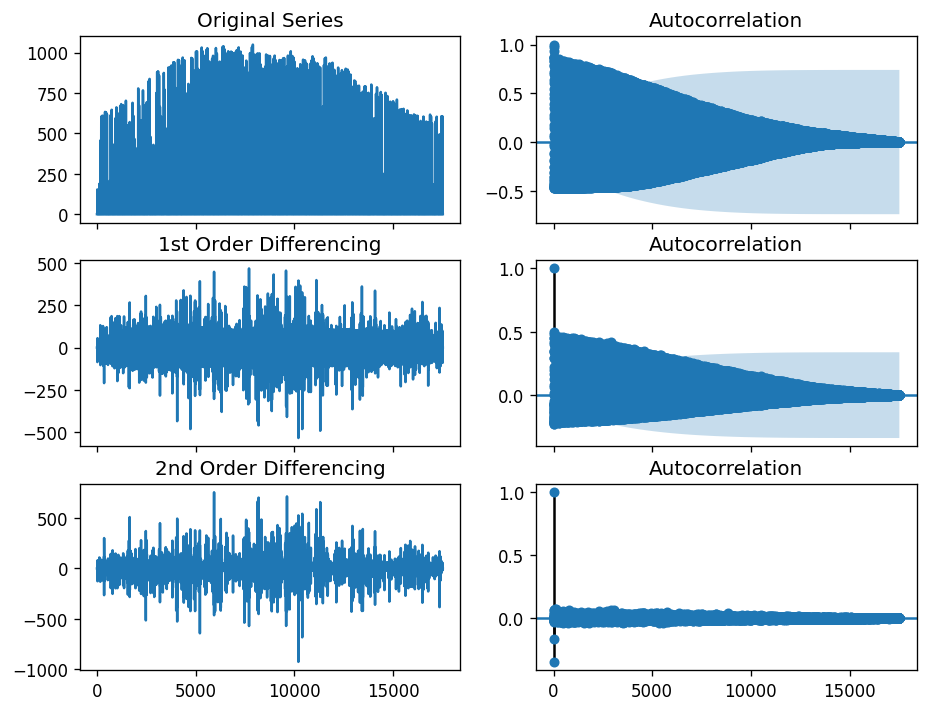

In [7]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.GHI); axes[0, 0].set_title('Original Series')
plot_acf(df.GHI, ax=axes[0, 1], lags=df.GHI.shape[0] - 1)

# 1st Differencing
axes[1, 0].plot(df.GHI.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.GHI.diff().dropna(), ax=axes[1, 1], lags=df.GHI.shape[0] - 2)

# 2nd Differencing
axes[2, 0].plot(df.GHI.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.GHI.diff().diff().dropna(), ax=axes[2, 1], lags=df.GHI.shape[0] - 3)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[ 4.49226505  6.80807805  7.99329893 ... 12.98611051 13.21695519
 13.34374151]
[0 0 0 ... 0 0 0]


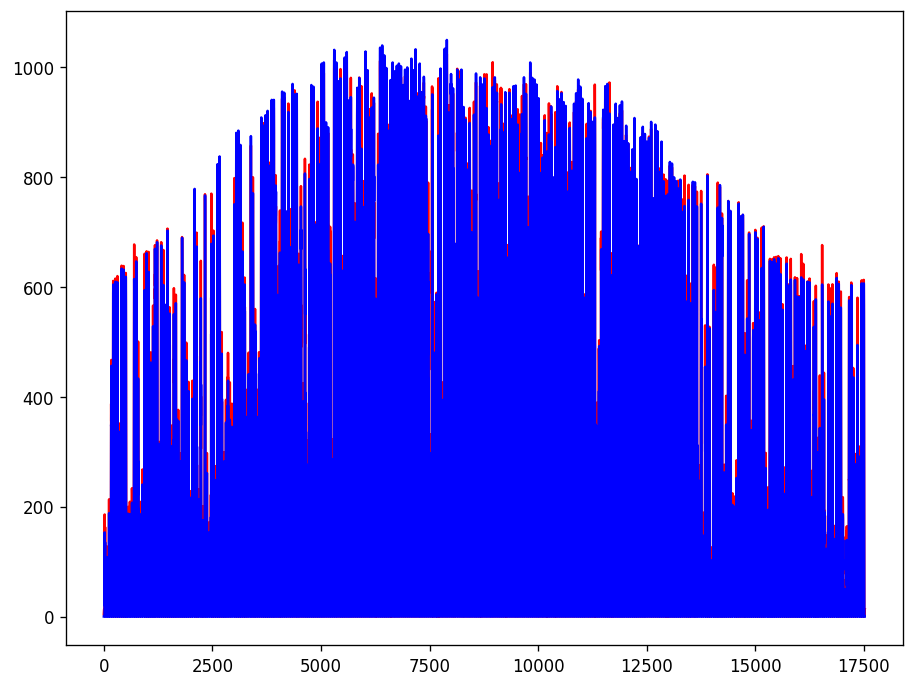

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

# # 2,0,3 ARIMA Model
values = df.GHI.to_numpy()
size = int(len(values) * 0.8)

model = ARIMA(df.GHI, order=(2,0,3))
model_fit = model.fit(disp=0)
#model_fit.plot_predict(dynamic=False)

forecasts = model_fit.predict(start = 1, end = len(values))
forecasts = forecasts.to_numpy()
forecasts[forecasts < 0] = 0
print(forecasts)
print(values)

plt.plot(forecasts, color = 'red')
plt.plot(values, color = 'blue')

plt.show()

In [ ]:
# from pandas import read_csv
# from pandas import datetime
# from matplotlib import pyplot as plt
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error

# values = df.GHI.to_numpy()
# size = int(len(values) * 0.8)
# train, test = values[0:size], values[size:len(values)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
#     model = ARIMA(history, order=(2, 0, 3))
#     model_fit = model.fit(disp=0)
#     output, _, _ = model_fit.forecast()
#     yhat = output[0]
#     if yhat < 0:
#         yhat = 0
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
# # plot
# plt.plot(test, color = 'blue')
# plt.plot(predictions, color = 'red')
# plt.show()
# print(test)
# print(predictions)

In [19]:
prediction_df = pd.DataFrame(forecasts, columns =['Predictions']) 
prediction_df
# df['Predictions'] = predictions
# df

,Predictions
0,4.492265
1,6.808078
2,7.993299
3,9.904111
4,11.059366
...,...
17515,11.826422
17516,12.569182
17517,12.986111
17518,13.216955


In [21]:
df['Predictions'] = prediction_df
df
df.to_csv('2019-data/Merriweather_2019_wPreds.csv')

In [ ]:
from statsmodels.tsa.stattools import acf

length = len(df.GHI)
amt = 700
diff = length - amt
# Create Training and Test
train = df.GHI[:diff]
test = df.GHI[diff:]
print(len(train))
print(len(test))

In [ ]:
# Build Model
model = ARIMA(train, order=(2, 0, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(amt, alpha=0.05)  # 95% conf
fc[fc < 0] = 0

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
fc_series = fc_series.where(fc_series > 0, 0)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.xlim(0, diff + 75)
plt.ylim(-50, 1000)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Forecast
print(fc[:5])

In [ ]:
# Actual
print(df.GHI[diff:diff + 5].to_numpy())